# Vilnius Coding School
# Duomenų analitikos vakariniai mokymai (20230419VCSDMAVAK)
# Kurso modulio „Python“ 2 užduotis

Autorius – **Dainius Bakys**

Versija **1.5.0**

## Glaustas užduoties aprašymas

Sukurkite Python programą, kuri strutūrą „DataFrame“ (lentelę) užpildytų duomenimis ir atliktų nurodytus veiksmus su ja, naudodama biblioteką „Pandas“.

1. Sukurkite lentelę „Saldainiai“ su stulpeliais:
    - „Pavadinimas“,
    - „Tipas“,
    - „1 kg kaina“,
    - „Perkamas kiekis“.
<br><br>
2. Iš CSV tipo failo nuskaitykite ir užpildykite struktūrą „DataFrame“ (toliau – **lentelė**) duomenimis, kurioje būtų daugiau nei 10 saldainių: pasirinktai užpildykite, pvz., ("Miglė", "Šokoladiniai", 6.0, 2) ir t. t.
<br><br>
3. Išveskite ekrane tik tuos saldainius, kurių tipas „Šokoladiniai“ IR kaina daugiau nei 5 Eur.
<br><br>
4. Naudodami funkciją „input“, leiskite naudotojui įvesti saldainio pavadinimą, tada ištrinkite visą tą saldainį lentelėje atitinkančią eilutę.
<br><br>
5. Išveskite ekrane tarpinius rezultatus.
<br><br>
6. Naudodamiesi „Python“ bibliotekomis „Matplotlib“ ar „Seaborn“, atvaizduokite bent du grafikus (skirtingų tipų – pvz., linijinio, stulpelinio, taškinio ar (ir) kt.), pvz., „Kaina / Saldainis“. Pakaitaliokite grafikų parametrus, pvz., spalvų paletę. Grafikai turi turėti ašių pavadinimus, reikšmes ant ašių, bendrą pavadinimą. Dar gali turėti legendą ar (ir) kt. pasirinktą informaciją.

## Bibliotekų ir modulių įtraukimas

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sb

from os.path import exists
import time

## Klasės ir konstantos spalvoms

**Pastaba.** Spalvos bei stiliai naudojami išvedant duomenis komandinėje eilutėje.

In [3]:
class ST:   # ST – Stilius.
    """ Papildomos spalvos tekstui, išvedant jį komandinėje eilutėje. """
    DEFAULT, BOLD, ITALIC, GREEN, GREY, MAGENTA, DARK, RED = \
    "\033[0m", "\033[1m", "\033[3m", "\033[32m", "\033[37m", "\033[35m", "\033[90m", "\033[31m"


class STN:  # STN – Stiliaus nėra.
    """ Papildomos spalvos tekstui, išvedant jį komandinėje eilutėje. Čia jei spalvos NEnaudojamos. """
    DEFAULT = BOLD = ITALIC = GREEN = GREY = MAGENTA = CRYAN = RED = ""
    
    
class Dydziai:
    """ Papildomos konstantos (nuostatos). """
    MAKS_EILUCIU = 100
    MAKS_STULPELIU = 100

## Funkcijų aprašai

In [5]:
# Funkcijų aprašai.

def isvesti_bloko_antraste(tekstas):
    """ Išveda ekrane bloko antraštę. """
    print(f"{ST.BOLD}{str(tekstas).upper()}{ST.DEFAULT}\n")


def isvesti_ispejamaji_pranesima(tekstas):
    """ Išveda ekrane apipavidalintą įspėjamąjį (pvz., klaidos ar pan.) tekstą. """
    print(f"{ST.RED}{tekstas}{ST.DEFAULT}\n")


def paryskintas(tekstas):
    """ Grąžina paryškintą tekstą. """
    return f"{ST.BOLD}{str(tekstas)}{ST.DEFAULT}"


def lt_kiekis_suma(skaicius, skaitmenu_po_kablelio=2) -> str:
    """ Paverčia ir grąžina kiekį ar sumą išvedimui taisyklingu lietuvišku formatu. """
    if skaicius is None:
        return ""
    skaicius = str(skaicius).strip()
    if not ar_skaicius(skaicius):
        return skaicius
    skaicius = round(float(skaicius), 8)
    formatas = "{:,." + str(skaitmenu_po_kablelio) + "f}"
    if round(skaicius, skaitmenu_po_kablelio) != skaicius:
        formatas = "{:,}"
    return str(formatas.format(skaicius)).replace(",", " ").replace(".", ",").replace("-", "–")


def lt_skaicius(skaicius, skaitmenu_po_kablelio=8) -> str:
    """ Paverčia ir grąžina skaičių išvedimui taisyklingu lietuvišku formatu. """
    if skaicius is None:
        return ""
    skaicius = str(skaicius).strip()
    if not ar_skaicius(skaicius):
        return skaicius
    skaicius = round(float(skaicius), skaitmenu_po_kablelio)
    if round(skaicius) == skaicius:
        skaicius = int(skaicius)
    else:
        skaicius = float(skaicius)
    return str("{:,}".format(round(skaicius, skaitmenu_po_kablelio))).replace(",",
                                                                              " ").replace(".", ",").replace("-", "–")


def ar_skaicius(tekstas):
    """ Grąžina atsakymą, ar tektas yra kaip skaičius. """
    try:
        float(tekstas)
        return True
    except ValueError:
        return False


def pergeneruoti_eiles_numerius(lentele, eil_nr="Eilės Nr.", pradeti_nuo=1):
    """ Iš naujo sudaro ir lentelės indeksams priskiria iš eilės einančius eilės numerius. """
    if lentele.shape[0] > 0:
        lentele[eil_nr] = list(range(pradeti_nuo, lentele.shape[0] + 1))
        lentele.set_index(eil_nr, inplace=True)


def testi(tekstas, atskirti_eilute=True):
    """ Funkcija vykdoma tarp programos etapų. """
    if atskirti_eilute:
        print()
    # ivestis = input(tekstas)
    # print(tekstas)
    # print()
    time.sleep(0.5)


def lt_kiekis_suma_ant_grafiko_padalu(asis, mpl, skaitmenu_po_kablelio=8):
    """ Ant grafiko ašies padalų pateiktiems užrašams kviečia funkciją „lt_kiekis_suma“ (žr. prieš tai). """
    asis.set_major_formatter(mpl.ticker.FuncFormatter(lambda i, p: lt_kiekis_suma(i, skaitmenu_po_kablelio)))


def rikiavimas_lt(serija):
    """
    Rikiavimui grąžina seriją, kurioje, pvz., lietuviski rašmenys paversti lotyniškais jų atitikmenimis
    su prierašu X arba Z.
    """
    return serija.to_series().apply(lambda st: rikiavimo_lt_zodzio_sudarymas(st))


def rikiavimo_lt_zodzio_sudarymas(zodis):
    """ Pagal gautą lietuvišką ženklą grąžina pakeistą 2 ženklų kombinaciją. """
    zodis = zodis.upper()
    pakeitimai = {"Ą": "AZ", "Č": "CZ", "Ę": "EX", "Ė": "EZ", "Į": "IX",
                  "Š": "SZ", "Ų": "UX", "Ū": "UZ", "Ž": "ZZ", "Y": "IZ"}
    for keisti_is, keisti_i in pakeitimai.items():
        if keisti_is in pakeitimai.keys():
            zodis = zodis.replace(keisti_is, keisti_i)

    return zodis


def pop(zodynas, raktas):
    """ Grąžina naują žodyną, jame panaikinus nurodytą elementą. """
    naujas_zodynas = zodynas.copy()
    naujas_zodynas.pop(raktas)

    return naujas_zodynas


def sutrumpinti_teksta(tekstas, zenklu_riba=17):
    """ Grąžina sutrumpintą tekstą. """
    tekstas = str(tekstas)
    if len(tekstas) >= zenklu_riba:
        return tekstas[0:zenklu_riba-3] + "…" +tekstas[len(tekstas)-3:len(tekstas)]
    else:
        return tekstas


def isvesti_lentele(lentele, skaitiniai_stulpeliai=()):
    """ Išveda ekrane lentelę. """
    lentele_isvedimui = lentele.copy()
    if len(skaitiniai_stulpeliai) <= 0:
        skaitiniai_stulpeliai = lentele_isvedimui.columns
    # Pritaikome lietuvišką kiekio ir (ar) sumos išvedimo formatą.
    for stulpelis in skaitiniai_stulpeliai:
        lentele_isvedimui[stulpelis] =\
            lentele_isvedimui[stulpelis].apply(lambda sk: lt_kiekis_suma(sk))
    # Tik išvedimui šiek tiek atitraukiame stulpelių pavadinimus vieną nuo kito.
    for stulpelio_pavadinimas in lentele_isvedimui.columns:
        lentele_isvedimui.rename(columns={stulpelio_pavadinimas: " " + stulpelio_pavadinimas}, inplace=True)
    lentele_isvedimui.replace("nan", f"-> (trūksta)", inplace=True)
    linijos_ilgis = gauti_lenteles_ploti(lentele_isvedimui)
    print("—" * linijos_ilgis)
    print(lentele_isvedimui.to_string(max_rows=Dydziai.MAKS_EILUCIU, max_cols=Dydziai.MAKS_STULPELIU))
    isvesti_prierasa_apie_lenteles_dydi(lentele_isvedimui)
    print("—" * linijos_ilgis)


def gauti_lenteles_ploti(lentele):
    """ Grąžina lentelės plotį (ženklų pozicijų skaičių). """
    sarasas = lentele.to_string(max_rows=Dydziai.MAKS_EILUCIU, max_cols=Dydziai.MAKS_STULPELIU).splitlines()
    if len(sarasas) > 0:
        return len(sarasas[0]) + 1
    else:
        return 0


def isvesti_prierasa_apie_lenteles_dydi(lentele):
    """
    Išveda ekrane prierašą apie lentelės eilučių ir stulpelių kiekius,
    bet tik tuo atveju, jei lentelės stulpelių ar (ir) eilučių kiekis (-iai) viršija maks. išvedamą kiekį (-ius).
    """
    if lentele.shape[0] > Dydziai.MAKS_EILUCIU or lentele.shape[1] > Dydziai.MAKS_STULPELIU:
        print(f"\n({lentele.shape[0]} eil. × {lentele.shape[1]} stulp. (be indeksų stulp.))")   


def sarasas_i_eilutes(sarasas, teksto_itrauka="", maksimalus_plotis=65):
    """ Sąrašą apipavidalina ir suskaldo į eilutes pagal tam tikrą maks. plotį. """
    ar_pirmas_zodis_eiluteje = True
    visas_tekstas = ""
    eilute = ""
    for i, zodis in enumerate(sarasas):
        if ar_pirmas_zodis_eiluteje is True:
            eilute += str(teksto_itrauka)
            ar_pirmas_zodis_eiluteje = False
        eilute += str(f"„{zodis}“")
        if i + 1 < len(sarasas):    # Jei paskutinis žodis sąraše
            eilute += ","
            if len(eilute) + len(f"„{sarasas[i + 1]}“") + 2 > maksimalus_plotis:
                visas_tekstas += eilute + "\n"
                eilute = ""
                ar_pirmas_zodis_eiluteje = True
            else:
                eilute += " "
        else:
            visas_tekstas += eilute

    return visas_tekstas + "."

## Pagrindinės dalies pradžia

In [6]:
# Ar informacijos išvedime į ekraną naudojame spalvas (ir šrifto stilius).
ar_isvedime_naudoti_spalvas = True

# Toliau galime nurodyti, kurias programos dalis vykdysime ar nevykdysime (o 1–2 dalis vykdoma visada).
# Naudojama daugiau tik testavimo metu. Naudojimo metu čia visos dalys turi būti įjungtos (True).
programos_vykdymo_dalys = {
    "3 dalis":     True,   # Atfiltruotų duomenų išvedimas (pagal saldainio pavadinimą ir kainą).
    "4–5 dalys":   True,   # Įrašų trynimas pagal pasirinktą pavadinimą (-us).
    "6 dalis":     True,   # Grafikai ir suvestinės lentelės.
    "6.2 dalis":   True,   # 4 grafikai su „Matplotlib“ biblioteka.
    "6.3 dalis":   True    # 2 grafikai su „Seaborn“ biblioteka.
}

# Su informacijos išvedimu (ekrane) susijusios savybės (parametrai).
ST = ST if ar_isvedime_naudoti_spalvas else STN
itrauka = " " * 2
tesimo_pranesimas = f"{itrauka}{ST.DARK}Norėdami tęsti spauskite klavišą {ST.DEFAULT}{ST.BOLD}ENTER" \
                    f"{ST.DEFAULT}{ST.DARK} ir truputį palaukite.{ST.DEFAULT}"
palaukimas_sekundemis = 1
Dydziai.MAKS_EILUCIU = 40
Dydziai.MAKS_STULPELIU = 8
pd.set_option('display.max_rows', Dydziai.MAKS_EILUCIU)
pd.set_option('display.max_columns', Dydziai.MAKS_STULPELIU)


duomenu_failo_vardas = "Saldainių duomenys.csv"
saldainiai = pd.DataFrame()


isvesti_bloko_antraste("\n2 užduotis.")
print(paryskintas(f"{itrauka}1.5.0 versija.\n"))


2 UŽDUOTIS.

  1.5.0 versija.



## 1–2 dalys. Duomenų failo nuskaitymas ir visų duomenų išvedimas

### 1–2.1 dalys. Duomenų failo nuskaitymas

In [7]:
# Nuskaitome duomenų failą.

isvesti_bloko_antraste("1–2 dalys. Duomenų failo nuskaitymas ir visų duomenų išvedimas.")

# Bandome patikrinti ar egzistuoja, atidaryti ir nuskaityti duomenų failą.
if not exists(duomenu_failo_vardas):
    isvesti_ispejamaji_pranesima(f"{itrauka}DĖMESIO! Failas „{duomenu_failo_vardas}“ neegzistuoja!\n" +
                                 f"{itrauka}Programos pabaiga.")
    quit()  # Išeiname iš programos.
else:
    try:
        saldainiai = pd.read_csv(duomenu_failo_vardas, delimiter=";", on_bad_lines="skip", encoding="utf-8")

        print(f"{itrauka}{ST.BOLD}{ST.GREEN}Failas „{duomenu_failo_vardas}“ nuskaitytas.{ST.DEFAULT}\n")
    except (FileNotFoundError, IOError, pd.errors.EmptyDataError, pd.errors.ParserError):
        isvesti_ispejamaji_pranesima(f"{itrauka}DĖMESIO! Nepasisekė nuskaityti failo „{duomenu_failo_vardas}“!")

# Patikriname ar iš failo nuskaityti duomenys yra pakankamai tinkami.
if len(saldainiai.index) <= 0:
    isvesti_ispejamaji_pranesima(f"{itrauka}DĖMESIO! Nėra saldainių duomenų!\n" +
                                 f"{itrauka}Programos pabaiga.")
    quit()  # Išeiname iš programos.
else:
    reikalaujamos_antrastes = ["Pavadinimas", "Tipas", "1 kg kaina", "Perkamas kiekis"]
    esamos_antrastes = list(saldainiai.columns)
    if esamos_antrastes != reikalaujamos_antrastes:
        isvesti_ispejamaji_pranesima(f"{itrauka}DĖMESIO! Nepakankamai tinkama nuskaitytų duomenų struktūra!\n" +
                                     f"{itrauka}Turi būti duomenų antraštės laukeliai:\n" +
                                     f"{itrauka}„" + "“, „".join(reikalaujamos_antrastes) + "“.\n\n"
                                     f"{itrauka}Programos pabaiga.")
        quit()  # Išeiname iš programos.

1–2 DALYS. DUOMENŲ FAILO NUSKAITYMAS IR VISŲ DUOMENŲ IŠVEDIMAS.

  Failas „Saldainių duomenys.csv“ nuskaitytas.



### 2.2 dalis. Pradinių nuskaitytų duomenų išvedimas

In [8]:
# Išvedame ekrane visų saldainių sąrąšą.
# Iš sąrašo išimame netinkamus įrašus, jei tokių yra
# ir vėl išvedame jau apdorotą sąrašą.

# Lentelės tekstiniuose duomenyje (reikšmėse), tekstuose, iš abiejų pusių apkarpome tarpus, jei tokių yra.
saldainiai = saldainiai.applymap(lambda s: s.strip() if isinstance(s, str) else s)

# Lentelės duomenyse tuščius tekstus keičiame „np.nan“.
saldainiai = saldainiai.replace(r'^\s*$', np.nan, regex=True)

# Sukuriame ir kaip indeksų stulpelį nustatome eilės numerių sąrašą (nuo 1), žr. funkcijos apibrėžtį.
pergeneruoti_eiles_numerius(saldainiai)

pradinis_irasu_kiekis = saldainiai.shape[0]

print(paryskintas(f"{itrauka}Pradinė lentelė. Visi saldainių duomenys.\n"))
print(f"{itrauka}Visų saldainių įrašų kiekis {paryskintas(lt_skaicius(pradinis_irasu_kiekis))}.\n")
isvesti_lentele(saldainiai)

  Pradinė lentelė. Visi saldainių duomenys.

  Visų saldainių įrašų kiekis 25.

——————————————————————————————————————————————————————————————————————
            Pavadinimas         Tipas     1 kg kaina  Perkamas kiekis
Eilės Nr.                                                            
1                 Miglė  Šokoladiniai           7,99             1,35
2           Jelly Sweet      Želiniai           4,63             0,85
3               Karvutė     Pieniniai           4,05             1,22
4                 Milka  Šokoladiniai           7,50             2,00
5               Vilnius  Šokoladiniai           4,33             0,48
6           Bon Fruites  Karameliniai           4,33            1,795
7                Bounty     Pieniniai          17,85             0,45
8          -> (trūksta)   Kramtomieji           5,01             0,45
9                Bounty     Pieniniai  šiaip tekstas             0,45
10               Bounty     Pieniniai         šiuklė             0,45
11       

In [9]:
# saldainiai

### 2.3 dalis. Netinkamais laikytinų įrašų pašalinimas

In [10]:
# Patikriname ir lentelėje pašaliname netinkamais laikytinus įrašus.
# Įrašas (eilutė) netinkamas:
# - jei jame yra bent viena skaitinė reikšmė NaN (įskantant tuščiq tekstq "", kuris į NaN jau buvo pakeistas prieš tai);
# - jei skaitinių reikšmių stulpelių laukeliuose yra ne skaitinė reikšmė, arba jei ji netinkama, pvz., neigiama.

# Funkcija „to_numeric“ laukų reikšmes verčia į skaičius; nepavykus paversti į skaičių, keičia į NaN reikšmes.
saldainiai["1 kg kaina"] = pd.to_numeric(saldainiai["1 kg kaina"], errors='coerce')
saldainiai["Perkamas kiekis"] = pd.to_numeric(saldainiai["Perkamas kiekis"], errors='coerce')

# Ištriname eilutes, kurios turi bent vieną lauką su NaN reikšme.
saldainiai.dropna(axis="rows", how="any", inplace=True)

# Atrenkame tik tuos įrašus, kurie turi neneigiamus skaičius.
saldainiai = saldainiai[(saldainiai["1 kg kaina"] >= 0) & (saldainiai["Perkamas kiekis"] >= 0)]

apdorodu_irasu_kiekis = saldainiai.shape[0]

if pradinis_irasu_kiekis > apdorodu_irasu_kiekis:
    print()
    print(paryskintas(f"{itrauka}{ST.MAGENTA}Dėmesio. Šioje lentelėje bus pašalinti netinkami įrašai."))
    print(f"{itrauka}Pašalinami tuščių laukų turintys įrašai bei netinkamas skaitines")
    print(f"{itrauka}reikšmes (ne skaičių ar neigiamą skaičių) turintys įrašai.")

    testi(tesimo_pranesimas)


  Dėmesio. Šioje lentelėje bus pašalinti netinkami įrašai.
  Pašalinami tuščių laukų turintys įrašai bei netinkamas skaitines
  reikšmes (ne skaičių ar neigiamą skaičių) turintys įrašai.



### 2.4 dalis. Apdorotosios lentelės išvedimas

In [11]:
if pradinis_irasu_kiekis > apdorodu_irasu_kiekis:
    pasalinti_eiles_numeriai = [nr for nr in range(1, pradinis_irasu_kiekis + 1) if nr not in saldainiai.index]

    print(paryskintas(f"{itrauka}{ST.GREEN}Apdorotoji lentelė. Saldainių duomenys.\n"))
    print(f"{itrauka}Pašalintų {paryskintas('netinkamų')} įrašų kiekis" +
          f" {paryskintas(lt_skaicius(pradinis_irasu_kiekis - apdorodu_irasu_kiekis))}.")
    print(f"{itrauka}Pašalintų įrašų buvę eilės numeriai (-is):\n" +
          f"{itrauka}  " + ", ".join(map(str, pasalinti_eiles_numeriai)) + ".\n")
    print(f"{itrauka}Likusių tinkamų įrašų kiekis {paryskintas(lt_skaicius(apdorodu_irasu_kiekis))}.")

    if apdorodu_irasu_kiekis > 0:
        pergeneruoti_eiles_numerius(saldainiai)
        print(f"{ST.GREEN}")
        isvesti_lentele(saldainiai)
        print(f"{itrauka}{ST.GREY}* Eilės numeriai perskaičiuoti iš naujo.{ST.DEFAULT}")
    else:
        isvesti_ispejamaji_pranesima(f"\n{itrauka}DĖMESIO! Lentelėje nebeliko įrašų, todėl tolimesnės programos\n" +
                                     f"{itrauka}dalys nebebus vykdomos.\n\n" +
                                     f"{itrauka}Programos pabaiga.")
        quit()  # Išeiname iš programos.

# Po programos kiekvienos pagrindinės dalies, tęsimui, naudotojo prašysime paspausti ENTER klavišą.
testi(tesimo_pranesimas)

  Apdorotoji lentelė. Saldainių duomenys.

  Pašalintų netinkamų įrašų kiekis 10.
  Pašalintų įrašų buvę eilės numeriai (-is):
    8, 9, 10, 11, 12, 13, 16, 17, 22, 23.

  Likusių tinkamų įrašų kiekis 15.

———————————————————————————————————————————————————————————————————
            Pavadinimas         Tipas  1 kg kaina  Perkamas kiekis
Eilės Nr.                                                         
1                 Miglė  Šokoladiniai        7,99             1,35
2           Jelly Sweet      Želiniai        4,63             0,85
3               Karvutė     Pieniniai        4,05             1,22
4                 Milka  Šokoladiniai        7,50             2,00
5               Vilnius  Šokoladiniai        4,33             0,48
6           Bon Fruites  Karameliniai        4,33            1,795
7                Bounty     Pieniniai       17,85             0,45
8            Neste Lion  Šokoladiniai       14,99            5,995
9          Roshen Antis  Karameliniai  5,52345679       

In [12]:
# saldainiai

## 3 dalis. Atfiltruotų saldainių sąrašas

In [13]:
# Išvedame ekrane tik atfiltruotų saldainių sąrašą.

if programos_vykdymo_dalys["3 dalis"]:
    filtras_saldainiu_tipas = "Šokoladiniai"
    filtras_saldainiu_kaina = 5

    filtras = (saldainiai["Tipas"] == filtras_saldainiu_tipas) & (saldainiai["1 kg kaina"] > filtras_saldainiu_kaina)
    atfiltruoti_saldainiai = saldainiai[filtras]

    atfiltruotu_irasu_kiekis = atfiltruoti_saldainiai.shape[0]

    isvesti_bloko_antraste(f"3 dalis. Tik {filtras_saldainiu_tipas.lower()} saldainiai," +
                           f" ir kurių 1 kg kaina daugiau nei {filtras_saldainiu_kaina} Eur.")
    print(f"{itrauka}Šių atfiltruotų saldainių įrašų kiekis" +
          f" {paryskintas(lt_skaicius(atfiltruotu_irasu_kiekis))}.\n")

    if atfiltruotu_irasu_kiekis > 0:
        isvesti_lentele(atfiltruoti_saldainiai)
        print()

    testi(tesimo_pranesimas, atskirti_eilute=False)

3 DALIS. TIK ŠOKOLADINIAI SALDAINIAI, IR KURIŲ 1 KG KAINA DAUGIAU NEI 5 EUR.

  Šių atfiltruotų saldainių įrašų kiekis 4.

——————————————————————————————————————————————————————————————————
           Pavadinimas         Tipas  1 kg kaina  Perkamas kiekis
Eilės Nr.                                                        
1                Miglė  Šokoladiniai        7,99             1,35
4                Milka  Šokoladiniai        7,50             2,00
8           Neste Lion  Šokoladiniai       14,99            5,995
14          Neste Lion  Šokoladiniai       13,99             8,99
——————————————————————————————————————————————————————————————————



In [14]:
# atfiltruoti_saldainiai

## 4–5 dalys. Pasirinktų saldainių trynimas iš lentelės

In [15]:
# Leidžiame naudotojui įvesti saldainių pavaidnimą,
# pagal kurį būtų ištrintas (-i) tų saldainių įrašas (-ai).

if programos_vykdymo_dalys["4–5 dalys"]:
    isvesti_bloko_antraste(f"4–5 dalys. Pasirinktų saldainių trynimas iš lentelės.")

    while True:
        print(f"{itrauka}Įveskite trinamų saldainių pavadinimą.")
        print(f"{itrauka}Norėdami NUTRAUKTI šį įvedimą ir IŠEITI iš trynimo etapo,")
        print(f"{itrauka}{paryskintas('įveskite 0')}.\n")
        print(f"{itrauka}Galite rinktis iš šių saldainių pavadinimų (veskite BE kabučių):")
        print(f"{ST.GREY}{ST.ITALIC}" + sarasas_i_eilutes(sorted(list(set(saldainiai["Pavadinimas"].tolist()))),
              teksto_itrauka=itrauka + "  ") + f"\n{ST.DEFAULT}")

        trinamo_saldainio_pavadinimas = input(f"{itrauka}Įveskite >>> ").strip()
        print()

        if trinamo_saldainio_pavadinimas == "0":
            break   # Naudotojas pasirinko užbaigti trynimo etapą.
        if len(trinamo_saldainio_pavadinimas) <= 0:
            print(paryskintas(f"{itrauka}Dėmesio. NIEKO neįvedėte, prašome pakartoti įvedimą.\n"))
            continue    # Grįžtame į ciklo pradžią ir prašome pakartoti įvedimą iš naujo.
        if trinamo_saldainio_pavadinimas not in saldainiai["Pavadinimas"].values:
            print(paryskintas(f"{itrauka}Dėmesio. Jūsų įvesto pavadinimo NĖRA lentelėje. Niekas neištrinta.\n"))
            continue  # Grįžtame į ciklo pradžią ir prašome pakartoti įvedimą iš naujo.

        trinami_irasai = saldainiai[saldainiai["Pavadinimas"] == trinamo_saldainio_pavadinimas]
        trynimo_pranesimai = ["Trinamas šis įrašas!", "Įrašas ištrintas."]
        if trinami_irasai.shape[0] > 1:
            trynimo_pranesimai = [f"Trinami šie ({trinami_irasai.shape[0]}) įrašai!",
                                  f"Įrašai ({trinami_irasai.shape[0]}) ištrinti."]

        # Išvedame ekrane trynimui pasirinktus saldainių įrašus.
        print(ST.MAGENTA)
        print(paryskintas(f"{itrauka}{trynimo_pranesimai[0]}"))
        print(ST.MAGENTA)
        isvesti_lentele(trinami_irasai)
        print(ST.DEFAULT)
        time.sleep(palaukimas_sekundemis / 2)
        # Triname įrašus (-ą).
        saldainiai.drop(saldainiai.loc[saldainiai["Pavadinimas"] == trinamo_saldainio_pavadinimas].index, inplace=True)
        print(paryskintas(f"{itrauka}{trynimo_pranesimai[1]}\n"))
        time.sleep(palaukimas_sekundemis / 2)

        # Iš naujo ekrane išvedame atnaujintą lentelę (jei ji dar netuščia).
        if saldainiai.shape[0] > 0:
            pergeneruoti_eiles_numerius(saldainiai)

            print(paryskintas(f"{itrauka}Atnaujintoji lentelė.\n"))
            print(f"{itrauka}Saldainių įrašų kiekis {paryskintas(saldainiai.shape[0])}.\n")
            isvesti_lentele(saldainiai)
            print(f"{itrauka}{ST.GREY}* Eilės numeriai perskaičiuoti iš naujo.{ST.DEFAULT}\n")
        else:
            isvesti_ispejamaji_pranesima(f"{itrauka}DĖMESIO! Visi įrašai iš lentelės ištrinti, lentelė tuščia,\n" +
                                         f"{itrauka}todėl tolimesnės programos dalys nebebus vykdomos.\n\n" +
                                         f"{itrauka}Programos pabaiga.")
            quit()  # Išeiname iš programos.

    print(paryskintas(f"{itrauka}Galutinė lentelė.\n"))
    print(f"{itrauka}Saldainių įrašų kiekis {paryskintas(lt_skaicius(saldainiai.shape[0]))}.\n")
    isvesti_lentele(saldainiai)

    testi(tesimo_pranesimas)

4–5 DALYS. PASIRINKTŲ SALDAINIŲ TRYNIMAS IŠ LENTELĖS.

  Įveskite trinamų saldainių pavadinimą.
  Norėdami NUTRAUKTI šį įvedimą ir IŠEITI iš trynimo etapo,
  įveskite 0.

  Galite rinktis iš šių saldainių pavadinimų (veskite BE kabučių):
    „Bon Fruites“, „Bounty“, „Cocoa“, „Fortūna“, „Jelly Sweet“,
    „Karvutė“, „Miglė“, „Milka“, „Neste Lion“, „Roshen Antis“,
    „Skittles“, „Vilnius“.

  Įveskite >>> Neste Lion


  Trinami šie (2) įrašai!

——————————————————————————————————————————————————————————————————
           Pavadinimas         Tipas  1 kg kaina  Perkamas kiekis
Eilės Nr.                                                        
8           Neste Lion  Šokoladiniai       14,99            5,995
14          Neste Lion  Šokoladiniai       13,99             8,99
——————————————————————————————————————————————————————————————————

  Įrašai (2) ištrinti.

  Atnaujintoji lentelė.

  Saldainių įrašų kiekis 13.

———————————————————————————————————————————————————————————————————
      

In [16]:
# saldainiai

## 6 dalis. Grafikai ir suvestinės lentelės

### 6.1 dalis. Suvestinės lentelės

In [17]:
# Išvedame suvestines lenteles.

if programos_vykdymo_dalys["6 dalis"]:
    isvesti_bloko_antraste("6 dalis. Grafikai ir suvestinės lentelės.")

    isvesti_bloko_antraste(f"{itrauka}6.1 dalis. Suvestinės lentelės.")

    # Pirmiausia papildomai apskaičiuojame ir įšvedame suvestinę perkamų kiekių lentelę pagal saldainių tipus.
    grp_kiekiai = saldainiai.groupby("Tipas")["Perkamas kiekis"].agg(["count", "sum", "mean"])
    grp_kiekiai["mean"] = grp_kiekiai["mean"].round(3)
    grp_kiekiai.rename(columns={"count": "Įrašų skaičius", "sum": "Bendras kiekis", "mean": "Vidutinis kiekis"},
                       inplace=True)
    grp_kiekiai.index.names = ["Saldainių tipas"]
    # Išrikiuojame pagal saldainių tipą, abėcėlės tvarka.
    grp_kiekiai.sort_index(ascending=True, inplace=True, key=rikiavimas_lt)

    print(paryskintas(f"{itrauka}1 suvestinė lentelė. Perkamas kiekis pagal saldainių tipus.\n"))
    print(f"{itrauka}Saldainių tipų kiekis (skaičius) {paryskintas(lt_skaicius(grp_kiekiai.shape[0]))}.")
    print(f"{itrauka}Saldainių bendras perkamas kiekis" +
          f" {paryskintas(lt_kiekis_suma(grp_kiekiai['Bendras kiekis'].sum()))} kg.\n")
    isvesti_lentele(grp_kiekiai, skaitiniai_stulpeliai=["Bendras kiekis", "Vidutinis kiekis"])
    print()

    # Tada papildomai apskaičiuojame ir įšvedame suvestinę kainų lentelę pagal saldainių tipus.
    grp_kainos = saldainiai.groupby("Tipas")["1 kg kaina"].agg(["count", "mean", "median"])
    grp_kainos[["mean", "median"]] = grp_kainos[["mean", "median"]].round(2)

    grp_kainos.rename(columns={"count": "Įrašų skaičius", "mean": "Vidutinė kaina", "median": "Kainos mediana"},
                      inplace=True)
    grp_kainos.index.names = ["Saldainių tipas"]
    # Išrikiuojame pagal saldainių tipą, abėcėlės tvarka.
    grp_kainos.sort_index(ascending=True, inplace=True, key=rikiavimas_lt)

    print(paryskintas(f"{itrauka}2 suvestinė lentelė. Vidutinės kainos pagal saldainių tipus.\n"))
    print(f"{itrauka}Saldainių tipų kiekis (skaičius) {paryskintas(lt_skaicius(grp_kiekiai.shape[0]))}.")
    print(f"{itrauka}Saldainių vidutinė kaina" +
          f" {paryskintas(lt_kiekis_suma(saldainiai['1 kg kaina'].mean().round(2)))} Eur už 1 kg.\n")
    isvesti_lentele(grp_kainos, skaitiniai_stulpeliai=["Vidutinė kaina", "Kainos mediana"])

    testi(tesimo_pranesimas)

6 DALIS. GRAFIKAI IR SUVESTINĖS LENTELĖS.

  6.1 DALIS. SUVESTINĖS LENTELĖS.

  1 suvestinė lentelė. Perkamas kiekis pagal saldainių tipus.

  Saldainių tipų kiekis (skaičius) 6.
  Saldainių bendras perkamas kiekis 18,92058 kg.

———————————————————————————————————————————————————————————————————
                  Įrašų skaičius  Bendras kiekis  Vidutinis kiekis
Saldainių tipas                                                   
Karameliniai                   4         5,18058             1,295
Kramtomieji                    1            2,00              2,00
Pieniniai                      2            1,67             0,835
Šokoladiniai                   4            6,33             1,582
Vafliniai                      1            2,89              2,89
Želiniai                       1            0,85              0,85
———————————————————————————————————————————————————————————————————

  2 suvestinė lentelė. Vidutinės kainos pagal saldainių tipus.

  Saldainių tipų kiekis (skaičius)

In [18]:
grp_kiekiai

,Įrašų skaičius,Bendras kiekis,Vidutinis kiekis
Saldainių tipas,,,
Karameliniai,4,5.18058,1.295
Kramtomieji,1,2.00000,2.000
Pieniniai,2,1.67000,0.835
Šokoladiniai,4,6.33000,1.582
Vafliniai,1,2.89000,2.890
Želiniai,1,0.85000,0.850


In [19]:
grp_kainos

,Įrašų skaičius,Vidutinė kaina,Kainos mediana
Saldainių tipas,,,
Karameliniai,4,5.64,5.32
Kramtomieji,1,22.90,22.90
Pieniniai,2,10.95,10.95
Šokoladiniai,4,6.20,6.24
Vafliniai,1,8.00,8.00
Želiniai,1,4.63,4.63


### 6.1.5 dalis. Įvairių „Matplotlib“ priemonės „Pyplot“ parametrų apibrėžtys ir kt. skaičiavimai

In [20]:
if programos_vykdymo_dalys["6 dalis"]:

    # Įvairių „Matplotlib“ priemonės „Pyplot“ parametrų apibrėžtys ir kt. skaičiavimai.

    mpl.rcParams["toolbar"] = "None"  # Nustatome, kad grafikų languose įrankių juostos neišvesime.

    # Paskaičiuojame reikiamą grafikų 1-ojo lango aukštį.
    lango_1_aukstis = 8
    if grp_kiekiai.shape[0] > 10:
        lango_1_aukstis += (grp_kiekiai.shape[0] - 10) * 0.4
    lango_1_aukstis = lango_1_aukstis if lango_1_aukstis < 10 else 10

    # Įvairūs „Pyplot“ parametrai.
    VAN_stilius = "Visos antraštės stilius"
    GAN_stilius = "Grafiko antraštės stilius"
    AS_stilius = "Ašių stilius"
    LEG_stilius = "Legendos stilius"
    SP_stilius = "Stulpelio prierašo stilius"

    plt_par = {
        "Bendri parametrai": {
            "font": {"family": "Trebuchet MS", "weight": "normal", "size": 10},
            "lines": {"linestyle": "solid", "antialiased": True, "marker": "o", "markersize": 20},
            "axes": {"facecolor": "#ffffff", "grid": True, "axisbelow": True},
            "xtick": {"color": "#000000", "labelsize": 10},
            "ytick": {"color": "#000000", "labelsize": 10},
            "grid": {"color": "#dae6ed", "linestyle": "--"},
            "figure": {"facecolor": "#f6fafe", "figsize": (12, lango_1_aukstis)}
        },
        VAN_stilius: {"weight": "bold", "fontsize": 15, "color": "#05263b", "y": 0.96},
        GAN_stilius: {"weight": "bold", "pad": 15, "fontsize": 12, "color": "#055c94"},
        AS_stilius: {"weight": "bold", "labelpad": 8, "fontsize": 11},
        LEG_stilius: {"edgecolor": "#dae6ed", "framealpha": 1.0, "labelspacing": 0.8},
        SP_stilius: {"padding": 4, "color": "#91acbf", "fontsize": 9}
    }

    # Nustatome pagrindinius „Pyplot“ parametrus.
    for grupe, parametrai in plt_par["Bendri parametrai"].items():
        plt.rc(grupe, **parametrai)

    # Spalvų paletės (rinkiniai) grafikams.
    daliu_spalvos = {
        "Mėlyna": ["#97caed", "#8ac2ea", "#7cbbe7", "#73b4e1", "#69afe0",
                   "#61a8d9", "#56a1d5", "#4e9cd2", "#4797cf", "#3e97d5"],
        "Violetinė": ["#a3a8ed", "#9aa0ed", "#8b94ea", "#808ae7", "#7a84e5",
                      "#727de3", "#6975e3", "#6271e7", "#5867e7", "#5060e7"],
        "Skirtingos": ["#7cc0ef", "#74d4b8", "#e77c90", "#a29fa6", "#e7b17c", "#d187dc", "#ad87dc",
                       "#8c7ad9", "#7a90d9", "#83684d"] + ["#8ca3b1"] * 100
    }
    daliu_spalvos["Mėlyna"] = daliu_spalvos["Mėlyna"] + list(reversed(daliu_spalvos["Mėlyna"][1: -1]))
    daliu_spalvos["Violetinė"] = daliu_spalvos["Violetinė"] + list(reversed(daliu_spalvos["Violetinė"][1: -1]))

    grafiko_remeliu_spalva = "#3a7eae"

    # Apkarpome tam tikruose grafikuose išvedamus saldainių tipų pavadinimus.
    grp_kiekiai.index = grp_kiekiai.index.map(lambda s: sutrumpinti_teksta(s))
    grp_kainos.index = grp_kainos.index.map(lambda s: sutrumpinti_teksta(s))

    # Pasiruošiame duomenis grafikams.
    saldainiu_tipai = tuple(grp_kiekiai.index)
    irasu_skaiciai = tuple(grp_kiekiai["Įrašų skaičius"])

    kiekiai = tuple(grp_kiekiai["Bendras kiekis"])
    kiekiu_vidurkiai = tuple(grp_kiekiai["Vidutinis kiekis"])

    kainu_vidurkiai = tuple(grp_kainos["Vidutinė kaina"])
    kainu_mediana = tuple(grp_kainos["Kainos mediana"])

    # Kiti grafikų paišymui naudojami parametrai.
    x_padalu_pozicijos = np.arange(len(saldainiu_tipai))

    # Apskaičiuojame teksto ant tam tikrų ašių (stulpeliniuose grafikuose) reikiamą pasukimo kampą.
    teksto_pasukimas = 0
    if len(saldainiu_tipai) >= 10:
        teksto_pasukimas = 90  # Statmenas.
    elif len(saldainiu_tipai) >= 5:
        teksto_pasukimas = round(20 + (8 * (len(saldainiu_tipai) - 4)))

### 6.2 dalis. Grafikai naudojant „Matplotlib“ biblioteką

  6.2 DALIS. GRAFIKAI NAUDOJANT „MATPLOTLIB“ BIBLIOTEKĄ.

  Dėmesio. Atidaromas atskiras grafikų langas, kuriame 
           pateikti 4 grafikai sudaryti su „Matplotlib“.
           Prašome žr. atskirą langą.

          Toliau, norėdami tęsti programą, primiau
          uždarykite tą atskirą grafikų langą.



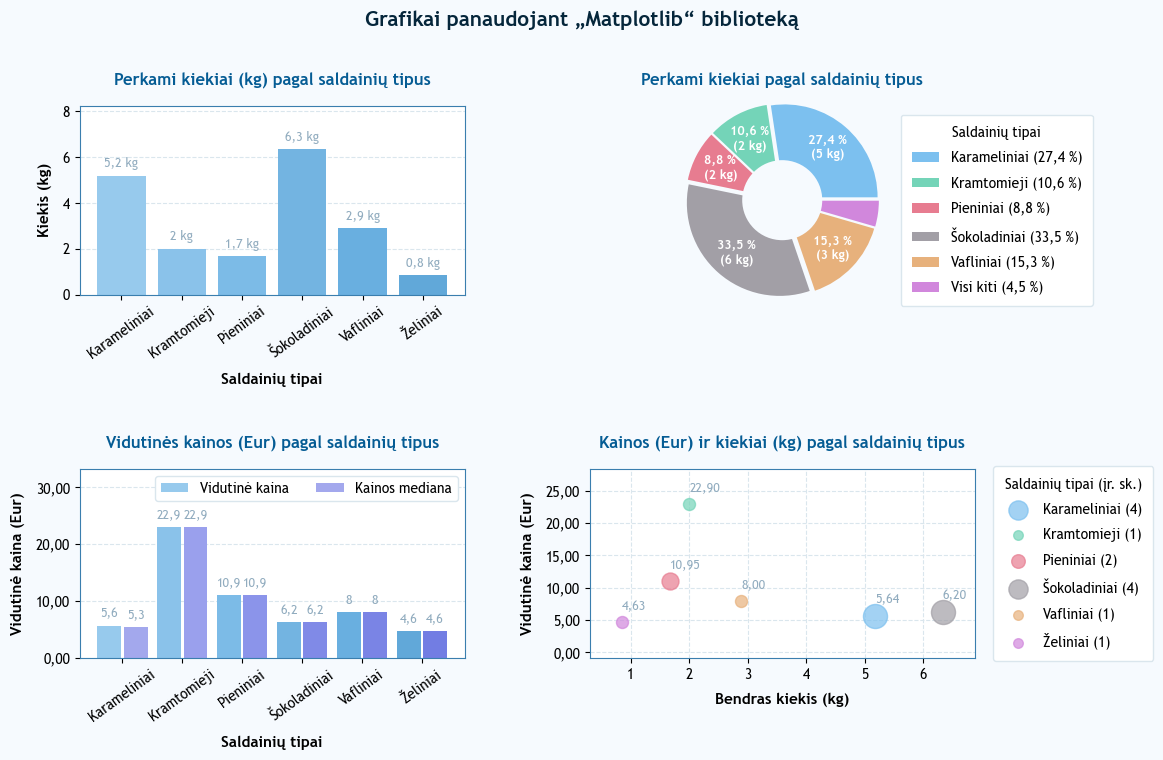

In [21]:
if programos_vykdymo_dalys["6 dalis"]:
    
    # Sudarome grafikus su „Matplotlib“ (MPL).
    if programos_vykdymo_dalys["6.2 dalis"]:
        isvesti_bloko_antraste(f"{itrauka}6.2 dalis. Grafikai naudojant „Matplotlib“ biblioteką.")

        # ————————————————————————————————————————————————————————————
        # 1-ojo MPL grafiko sudarymas – stulpelinio tipo.
        #

        langas_1 = plt.figure(num="Grafikai panaudojant „Matplotlib“ biblioteką")
        g1 = langas_1.add_subplot(2, 2, 1)
        g1.set_title("Perkami kiekiai (kg) pagal saldainių tipus", **plt_par[GAN_stilius])

        # Stulpelinis grafikas.
        g1.bar(x_padalu_pozicijos,
               kiekiai,
               width=0.8,
               color=daliu_spalvos["Mėlyna"],
               label="Bendras kiekis")

        for elementas in g1.containers:     # Pakoreguojame užrašus ant stulpelinio grafiko stulpelių.
            g1.bar_label(elementas, labels=[lt_skaicius(y, 1) + " kg" for y in elementas.datavalues],
                         **plt_par[SP_stilius])

        g1.set_xlabel("Saldainių tipai", **plt_par[AS_stilius])
        g1.set_ylabel("Kiekis (kg)", **plt_par[AS_stilius])
        g1.set_xticks(x_padalu_pozicijos, saldainiu_tipai)                # x ašies padalos.
        g1.set_xticklabels(saldainiu_tipai, rotation=teksto_pasukimas)      # x ašies padalų tesktas.
        g1.grid(axis="x")   # Čia rodomos tinklelio linijos lygiagrečios būtent x ašiai (statmenos y ašiai).
        lt_kiekis_suma_ant_grafiko_padalu(g1.yaxis, mpl, 0)                 # LT formatavimui ant ašies padalų.
        g1.margins(x=0.05, y=0.3)   # Grafiko įtrauka.
        for spine in g1.spines.values():
            spine.set_color(grafiko_remeliu_spalva)  # Grafiko visų rėmelių spalva.

        # ————————————————————————————————————————————————————————————
        # 2-ojo MPL grafiko sudarymas – stritulinio („spurgos“) tipo.
        #

        g2 = langas_1.add_subplot(2, 2, 2)
        g2.set_title("Perkami kiekiai pagal saldainių tipus", **plt_par[GAN_stilius])

        # Jeigu saldainių tipų daugiau, tai sąlyginai mažus kiekius turinčius saldainių tipus
        # apjungiame į vieną bendrą tipą „Visi kiti“, kad tinkamiau atvaizduotume būtent skritulinį grafiką.
        riba = round(sum(kiekiai) / (len(kiekiai) * 2), 3)
        kiekiai_g2 = dict([(saldainiu_tipai[i], kiekiai[i]) for i in range(len(kiekiai)) if kiekiai[i] >= riba])
        kiekiai_g2["Visi kiti"] = round(sum([kiekis for kiekis in kiekiai if kiekis < riba]), 2)

        def uzrasai_proc(procentai, reiksmes):
            """ Grąžina tekstą, atvaizdavimui skritulinio grafiko skiltyse. """
            suma = int(round((procentai / 100) * sum(reiksmes)))
            if procentai < 8:   # Jei mažiau nei 8 %, skritulioniame grafike tekstas neišvedamas.
                return ""
            else:
                return f"{lt_skaicius(round(procentai, 1))} %\n({lt_skaicius(suma)} kg)"

        # Skritulinis grafikas.
        g2.pie(kiekiai_g2.values(),
               radius=1.23,
               colors=daliu_spalvos["Skirtingos"],
               explode=((0.05,) * len(kiekiai_g2)),
               autopct=lambda pct: uzrasai_proc(pct, kiekiai_g2.values()),
               pctdistance=0.71,
               textprops=dict(color="#ffffff", size=9, weight="bold"))

        sarasas_g2_legendai = []
        for raktas, reiksme in kiekiai_g2.items():
            sarasas_g2_legendai.append(f"{raktas} ({lt_skaicius(round(100 * reiksme / sum(kiekiai), 1), 1)} %)")

        g2.legend(title="Saldainių tipai", labels=sarasas_g2_legendai, borderpad=0.8,
                  bbox_to_anchor=(1.09, 0.99), loc="upper left", **plt_par[LEG_stilius])

        # Grafiko viduryje paišome fono spalvos apskritimą, kad grafiko vidus atrodytų kaip iškirptas:
        # gauname žiedo formos (angl. „donut“) tipo skritulinį grafiką.
        apskritimas_grafiko_centre = plt.Circle((0, 0), radius=0.53, alpha=1,
                                                facecolor=plt_par["Bendri parametrai"]["figure"]["facecolor"])
        langas_1.gca().add_artist(apskritimas_grafiko_centre)

        # ————————————————————————————————————————————————————————————
        # 3-ojo MPL grafiko sudarymas.
        #

        stulpeliu_vietos_plotis = 0.44
        stulpelio_plotis = 0.40

        g3 = langas_1.add_subplot(2, 2, 3)
        g3.set_title("Vidutinės kainos (Eur) pagal saldainių tipus", **plt_par[GAN_stilius])

        # Šiame stulpeliniame grafike išvesime stuleplių poras (aritmeitinius vidurkius ir medianas).
        g3.bar(x_padalu_pozicijos,
               kainu_vidurkiai,
               width=stulpelio_plotis,
               color=daliu_spalvos["Mėlyna"],
               label="Vidutinė kaina")

        g3.bar(x_padalu_pozicijos + stulpeliu_vietos_plotis,
               kainu_mediana,
               width=stulpelio_plotis,
               color=daliu_spalvos["Violetinė"],
               label="Kainos mediana")

        l_skaitmenu_po_kablelio = 1 if len(saldainiu_tipai) <= 8 else 0     # Atvaizdavimo sutraukimo specifika.
        for elementas in g3.containers:     # Pakoreguojame užrašus ant stulpelinio grafiko stulpelių (dėl LT kalbos).
            g3.bar_label(elementas, labels=[lt_skaicius(y, l_skaitmenu_po_kablelio) for y in elementas.datavalues],
                         **plt_par[SP_stilius])

        g3.set_xlabel("Saldainių tipai", **plt_par[AS_stilius])
        g3.set_ylabel("Vidutinė kaina (Eur)", **plt_par[AS_stilius])
        g3.set_xticks(x_padalu_pozicijos + round(stulpeliu_vietos_plotis / 2, 2), saldainiu_tipai)    # x padalos.
        g3.set_xticklabels(saldainiu_tipai, rotation=teksto_pasukimas)     # x ašies padalų tesktas.
        g3.legend(loc='upper right', ncols=2, **plt_par[LEG_stilius])
        g3.grid(axis="x")   # Čia rodomos tinklelio linijos lygiagrečios būtent x ašiai (statmenos y ašiai).
        lt_kiekis_suma_ant_grafiko_padalu(g3.yaxis, mpl, 2)     # LT formatavimui ant ašies padalų.
        g3.margins(x=0.05, y=0.45)  # Grafiko įtrauka.
        for spine in g3.spines.values():
            spine.set_color(grafiko_remeliu_spalva)  # Grafiko visų rėmelių spalva.

        # ————————————————————————————————————————————————————————————
        # 4-ojo MPL grafiko sudarymas.
        #

        g4 = langas_1.add_subplot(2, 2, 4)
        g4.set_title("Kainos (Eur) ir kiekiai (kg) pagal saldainių tipus", **plt_par[GAN_stilius])

        # Toliau naudojamo sklaidos grafiko apskritimų dydžių nustatymui sukuriame naują sąrašą,
        # kuriame sąrašo reikšmės transformuotos į reikšmės nuo 0 iki 300.
        normalizuoti_irasu_skaiciai = list(map(lambda i: i / max(irasu_skaiciai) * 300, irasu_skaiciai))

        # Sklaidos (taškinis) grafikas.
        for i, kiekis in enumerate(kiekiai):
            g4.scatter(x=kiekis,
                       y=kainu_vidurkiai[i],
                       alpha=0.7,
                       s=(np.array(normalizuoti_irasu_skaiciai[i])),
                       color=daliu_spalvos["Skirtingos"][i],
                       label=f"{saldainiu_tipai[i]} ({irasu_skaiciai[i]})")

        g4.set_xlabel("Bendras kiekis (kg)", **plt_par[AS_stilius])
        g4.set_ylabel("Vidutinė kaina (Eur)", **plt_par[AS_stilius])
        lt_kiekis_suma_ant_grafiko_padalu(g4.xaxis, mpl, 0)     # LT formatavimui ant X ašies padalų.
        lt_kiekis_suma_ant_grafiko_padalu(g4.yaxis, mpl, 2)     # LT formatavimui ant Y ašies padalų.
        g4.margins(x=0.1, y=0.3)    # Grafiko įtrauka.
        g4.legend(title="Saldainių tipai (įr. sk.)", borderpad=0.8, ncols=1, markerscale=0.8,
                  bbox_to_anchor=(1.03, 1.05), loc="upper left", **plt_par[LEG_stilius])
        for spine in g4.spines.values():
            spine.set_color(grafiko_remeliu_spalva)  # Grafiko visų rėmelių spalva.

        # Sklaidos tipo grafike pateikiame vidutines kainas prie apskritimų.
        for skaicius, kiekis, kainos_vidurkis in zip(irasu_skaiciai, kiekiai, kainu_vidurkiai):
            # TODO čia teksto laukelio pozicijos pagal y ašį apskaičiavimas dar tobulintinas.
            pozicija_y = kainos_vidurkis + 0.11 * (max(kainu_vidurkiai) - min(kainu_vidurkiai) + 1 - 2 / skaicius)
            g4.annotate(f"{lt_kiekis_suma(kainos_vidurkis, 2)}", (kiekis, pozicija_y), color="#91acbf", fontsize=9)

        # ————————————————————————————————————————————————————————————
        # Baigiamieji MPL grafikų pateikimo žingsniai.
        #

        print(paryskintas(f"{itrauka}Dėmesio. {ST.DEFAULT}Atidaromas atskiras grafikų langas, kuriame \n" +
                          f"{itrauka}         pateikti 4 grafikai sudaryti su „{paryskintas('Matplotlib')}“.\n" +
                          f"{itrauka}         Prašome žr. atskirą langą.\n"))
        time.sleep(palaukimas_sekundemis)
        print(paryskintas(f"{itrauka}        Toliau, norėdami tęsti programą, primiau\n" +
                          f"{itrauka}        uždarykite tą atskirą grafikų langą.\n"))

        langas_1.tight_layout(pad=2, w_pad=4, h_pad=5)     # Atitraukimai tarp grafikų.
        langas_1.suptitle("Grafikai panaudojant „Matplotlib“ biblioteką", **plt_par[VAN_stilius])
        langas_1.subplots_adjust(top=0.84)
        plt.autoscale(False)
        plt.show(block=True)

### 6.3 dalis. Grafikai naudojant „Seaborn“ biblioteką

  6.3 DALIS. GRAFIKAI NAUDOJANT „SEABORN“ BIBLIOTEKĄ.

  Dėmesio. Atidaromas kitas atskiras grafikų langas, kuriame
           pateikti 2 grafikai sudaryti su „Seaborn“.
           Prašome žr. kitą atskirą langą.



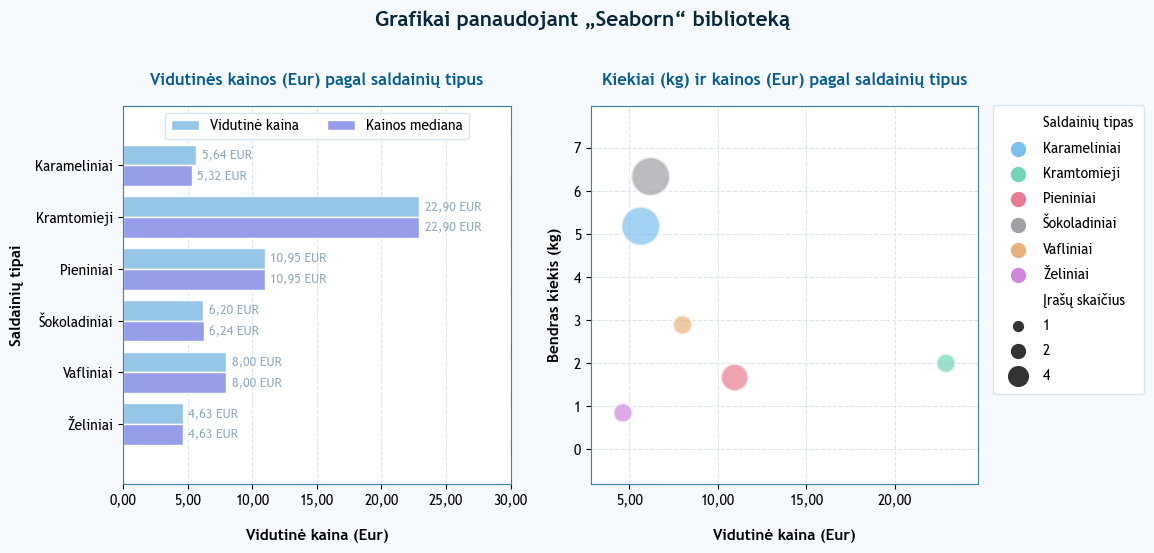

In [22]:
if programos_vykdymo_dalys["6 dalis"]:

    # Sudarome grafikus su „Seaborn“ (SB).

    if programos_vykdymo_dalys["6.3 dalis"]:
        isvesti_bloko_antraste(f"{itrauka}6.3 dalis. Grafikai naudojant „Seaborn“ biblioteką.")

        # Sudarome papildomą lentelę, kurioje skirtingų tipų kainų vidurkiai sujungti į vieną stulpelį „Kaina“,
        # bei yra atskiras stulpelis „Skaičiavimo tipas“.
        # Skirta SB stulpeliniam grafikui (grafike panaudojant tada parametrą „hue="Skaičiavimo tipas"“).
        grp_kainos_trans = \
            grp_kainos.reset_index().melt(id_vars=["Saldainių tipas"],
                                          value_vars=["Vidutinė kaina", "Kainos mediana"],
                                          var_name="Skaičiavimo tipas", value_name="Kaina")

        # Sudarome kitą papildomą lentelę, kurioje įdėti bendri kiekiai ir vidutinės kainos.
        # Skirta SB sklaidos grafikui.
        grp_kiekiai_kainos = pd.concat(
            [grp_kiekiai.reset_index()[["Saldainių tipas", "Įrašų skaičius", "Bendras kiekis"]],
             grp_kainos.reset_index()["Vidutinė kaina"]], axis=1
        )

        # ————————————————————————————————————————————————————————————
        # 1-ojo SB grafiko sudarymas.
        #

        langas_2, pozicijos = plt.subplots(1, 2)

        # Stulpelinis gulsčias (juostinis) grafikas.
        sb_g1 = sb.barplot(x="Kaina",
                           y="Saldainių tipas",
                           data=grp_kainos_trans, ax=pozicijos[0],
                           hue="Skaičiavimo tipas",
                           linewidth=1,
                           edgecolor="#ffffff",
                           palette={"Vidutinė kaina": "#87c8f6", "Kainos mediana": "#8893f8"})

        sb_g1.set_title("Vidutinės kainos (Eur) pagal saldainių tipus", **plt_par[GAN_stilius])
        sb_g1.set_xlabel("Vidutinė kaina (Eur)", labelpad=15, **pop(plt_par[AS_stilius], "labelpad"))
        sb_g1.set_ylabel("Saldainių tipai", **plt_par[AS_stilius])
        sb_g1.legend(title="", borderpad=0.45, ncols=2, loc="upper center", **plt_par[LEG_stilius])
        sb_g1.margins(x=0.2, y=0.13)     # Grafiko įtrauka.
        for spine in sb_g1.spines.values():
            spine.set_color(grafiko_remeliu_spalva)  # Grafiko visų rėmelių spalva.

        for elementas in sb_g1.containers:  # Pakoreguojame užrašus ant stulpelinio grafiko stuleplių (dėl LT kalbos).
            sb_g1.bar_label(elementas, labels=[lt_kiekis_suma(x, 2) + " EUR" for x in elementas.datavalues],
                            **plt_par[SP_stilius])

        # Nustatome užrašus ant X ašies.
        zingsnis = round(round(max(saldainiai["1 kg kaina"]) - min(saldainiai["1 kg kaina"])) / 4)
        zingsnis = zingsnis if zingsnis > 1 else 1

        sb_g1.set_xticks(list(np.arange(0, round(max(grp_kainos_trans["Kaina"]) + zingsnis * 2), zingsnis)))
        xlabels = [lt_kiekis_suma(i) for i in sb_g1.get_xticks()]   # Visus skaičius ant ašies sulietuviname.
        sb_g1.set_xticklabels(xlabels)

        # ————————————————————————————————————————————————————————————
        # 2-ojo SB grafiko sudarymas.
        #

        # Sklaidos (taškinis) grafikas.
        sb_g2 = sb.scatterplot(x="Vidutinė kaina",
                               y="Bendras kiekis",
                               hue="Saldainių tipas",
                               data=grp_kiekiai_kainos,
                               ax=pozicijos[1],
                               size="Įrašų skaičius",
                               linewidth=2,
                               palette=daliu_spalvos["Skirtingos"][0:grp_kiekiai_kainos.shape[0]],
                               alpha=0.7)

        sb_g2.set_title("Kiekiai (kg) ir kainos (Eur) pagal saldainių tipus", **plt_par[GAN_stilius])

        sb_g2.set_xlabel("Vidutinė kaina (Eur)", labelpad=15, **pop(plt_par[AS_stilius], "labelpad"))
        sb_g2.set_ylabel("Bendras kiekis (kg)", **plt_par[AS_stilius])
        sb_g2.margins(x=0.1, y=0.3)  # Grafiko įtrauka.
        sb_g2.legend(title="", borderpad=0.8, ncols=1, markerscale=0.5,
                     bbox_to_anchor=(1.02, 1.02), loc="upper left", **plt_par[LEG_stilius])
        for spine in sb_g2.spines.values():
            spine.set_color(grafiko_remeliu_spalva)  # Grafiko visų rėmelių spalva.

        # Nustatome užrašus ant X ašies.
        zingsnis = round(round(max(saldainiai["1 kg kaina"]) - min(saldainiai["1 kg kaina"])) / 4)
        zingsnis = zingsnis if zingsnis > 1 else 1

        sb_g2.set_xticks(list(np.arange(0, round(max(grp_kiekiai_kainos["Vidutinė kaina"]) + zingsnis * 2), zingsnis)))
        xlabels = [lt_kiekis_suma(i, 2) for i in sb_g2.get_xticks()]  # Visus skaičius ant ašies sulietuviname.
        sb_g2.set_xticklabels(xlabels)

        # Nustatome užrašus ant Y ašies.
        zingsnis = round(round(max(grp_kiekiai["Bendras kiekis"]) - min(grp_kiekiai["Bendras kiekis"])) / 4)
        zingsnis = zingsnis if zingsnis > 1 else 1

        sb_g2.set_yticks(list(np.arange(0, round(max(grp_kiekiai_kainos["Bendras kiekis"]) + zingsnis * 2), zingsnis)))
        ylabels = [lt_kiekis_suma(i, 0) for i in sb_g2.get_yticks()]  # Visus skaičius ant ašies sulietuviname.
        sb_g2.set_yticklabels(ylabels)

        # ————————————————————————————————————————————————————————————
        # Baigiamieji SB grafikų pateikimo žingsniai.
        #

        print(paryskintas(f"{itrauka}Dėmesio. {ST.DEFAULT}Atidaromas kitas atskiras grafikų langas, kuriame\n" +
                          f"{itrauka}         pateikti 2 grafikai sudaryti su „{paryskintas('Seaborn')}“.\n" +
                          f"{itrauka}         Prašome žr. kitą atskirą langą.\n"))

        time.sleep(palaukimas_sekundemis / 2)

        langas_2.canvas.manager.set_window_title("Grafikai panaudojant „Seaborn“ biblioteką")
        langas_2.set_size_inches(12, 6)
        langas_2.tight_layout(pad=2, w_pad=1.5, h_pad=5)  # Atitraukimai tarp grafikų.
        langas_2.suptitle("Grafikai panaudojant „Seaborn“ biblioteką", **plt_par[VAN_stilius])
        langas_2.subplots_adjust(top=0.80, right=0.83, bottom=0.17)

        plt.autoscale(True)
        plt.show(block=True)

In [23]:
print(f"{itrauka}Programos pabaiga.\n")

  Programos pabaiga.

